# Fiddler May 23, 2025

---

## Part 1:

Let $P_i$ be the probability that the $i$-th character in a long line of fiddlerish is a space. We can set up the recurrence relation

$$
\begin{equation}
P_i = \frac{1}{2} P_{i - 4} + \frac{1}{2} P_{i - 5}
\end{equation}
$$

Since the only way the $i$-th character is a space is if the $i-4$-th character is a space followed by a 3 letter word or $i-5$-th character is a space followed by a 4 letter word.

The initial conditions are that

$$
\begin{align}
P_1, P_2, P_3 &= 0\\
P_4 &= 1/2 \\
P_5 &= 1/2
\end{align}
$$

Solving via Dynamic programming for $n \gg 1$ yields $$\boxed{P_n \to \frac{2}{9}}$$
which makes sense. Each word is chosen randomly, the total number of characters in the two words (including spaces) is 9 and 2 of the characters are spaces. 


In [113]:
from functools import cache
@cache
def p(i):
    if i <= 3:
        return 0
    elif i == 4:
        return 1 /2
    elif i == 5:
        return 1 / 2
    else:
        return (1 / 2) * p(i - 4) + (1 / 2) * p(i - 5)
    
print(f'The long run probability is around {p(1000)} which tends to {2/9}')

The long run probability is around 0.22222222222222215 which tends to 0.2222222222222222



---

## Part 2:
Now let $X_i$ be the indicator random variable denoting the event that on a given line the $i$-th character is a space. We are given that in the first line we care about, the 12-th character is a space (Note that this is the first position $i$ at which $P_i > 0\;  \forall j \geq i$).

To find the expected length of the river starting at position 12, we just need to find the expected length of the river (to the right) starting at postion 13 in the following row and then add 1. 

Let $N$ be the random variable denoting the length of the rightward river starting potentially at position 13. Since this is a non-negative discrete random variable, we can use the identitity

$$
\mathbb{E}[N] = \sum_{t = 0}^\infty \Pr[N > t]
$$

Which in our problem, $Pr[N > t]$ can be written 

$$
\begin{align*}
\Pr[N > t] &= \Pr[X_{13} =1, X_{14} =1, \ldots, X_{13 + t} =1] \\
& = \Pr[X_{13} =1] \cdot \Pr[X_{14} =1]  \cdots \Pr[X_{13 + t} =1] \\
& = P_{13} \cdots P_{13 + t} 
\end{align*}
$$

There may be a closed form for this, but since $P_i \leq 1/2$ for any $i$, these cumulant products should get very small very quickly and we should get a nice approxiatimation

In [115]:
def E(start_pos, max_line = 3000):
    ans = 1 # account fo the given space at start 
    cur_prod = 1
    for i in range(1, max_line):
        cur_prod *= p(start_pos + i)
        ans += cur_prod
    return ans


start = 12
print(f'Given a space at position {start}, the expected run length (to the right) is approximately {E(start): .6g}')

Given a space at position 12, the expected run length (to the right) is approximately  1.53471


This makes the observed river length of 11 in the given example, quite impressive! 

Just for fun, is there another starting position $(i > 12)$ at which the expected run length is larger? 




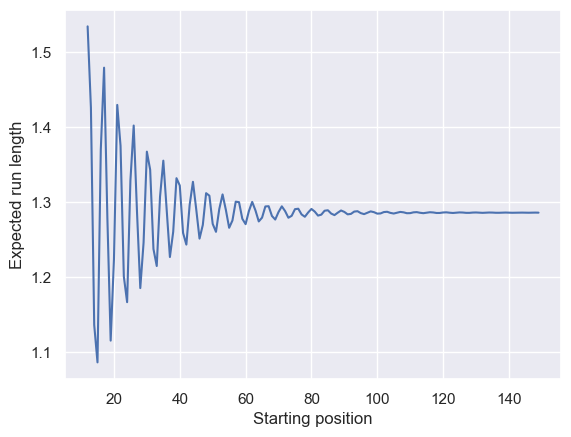

In [93]:
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

M = 150
expected_run_lengths = [E(i) for i in range(12, M)]

start_pos = [i for i in range(12, M)]
sns.set_theme(style='darkgrid')   
plt.plot(start_pos, expected_run_lengths)   
plt.xlabel('Starting position')
plt.ylabel('Expected run length')
plt.show()

From the figure, we can see that indeed that starting river position of $i = 12$ has the largest expected river length. We see this cool oscillatory behavior and the in the tail the expected value seems to converge.

We can see that, starting in late positions, the probability the next position is a space is $\approx 2/9$, the expected length of the streak of spaces is now a $\sim geo(7/9)$ random variable which has expected value of $9/7 \approx 1.285$ turns to get a non-space character, which (offsetting for the inital given space and final non-space), gives an expected river length of $9/7$ for later starting positions, which agrees with our DP calculation and explains the tail behavior we see in the figure above.

In [50]:
E(200) - 9/7
9/7

1.2857142857142858

To conclude, how does our analysis change for words of different length in the fiddlerish language?
We can generate a generic DP algorithm for words of length $\ell_1, \ell_2$ and repeat our analysis 

In [109]:
from functools import cache
@cache
def p(i, l1, l2):
    if i <= l1:
        return 0
    elif i == l1 + 1:
        return 1 / 2
    elif i ==  l2 + 1:
        return 1 / 2 + (1 / 2) * p(i - l1 - 1, l1, l2)
    
    
    return (1 / 2) * p(i - l2 - 1, l1, l2) + (1 / 2) * p(i - l1 - 1, l1, l2)
    
for i in range(1, 10):
    print(i, p(i, 2, 5))
    
def E(start_pos, l1 , l2,  max_line = 3000):
    ans = 1 # account fo the given space at start 
    cur_prod = 1
    for i in range(1, max_line):
        cur_prod *= p(start_pos + i, l1, l2)
        ans += cur_prod
    return ans


start = 12
print(f'Given a space at position {start}, the expected run length (to the right) is approximately {E(start, 2, 5): .6g}')

1 0
2 0
3 0.5
4 0.0
5 0.0
6 0.75
7 0.0
8 0.0
9 0.625
Given a space at position 12, the expected run length (to the right) is approximately  1


for l1 = 1 and l2 = 2, the long run probability is around 0.4 and the best expected run length is 1.8079463144059265


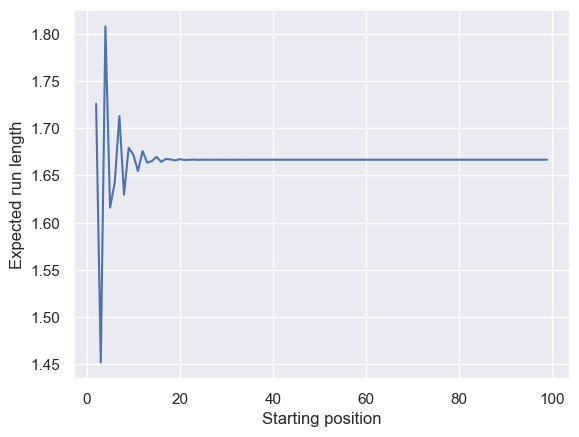

for l1 = 2 and l2 = 3, the long run probability is around 0.2857142857142857 and the best expected run length is 1.6492495583501068


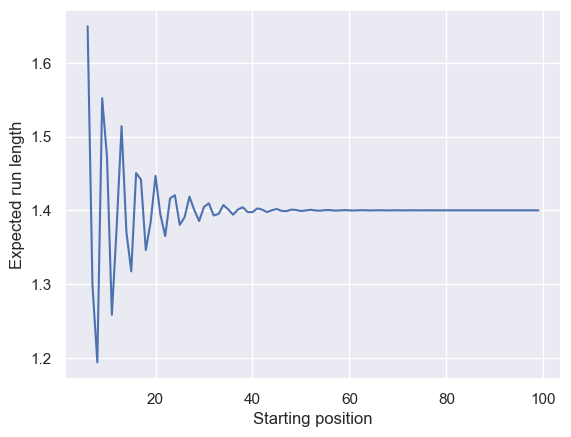

for l1 = 3 and l2 = 4, the long run probability is around 0.22222222222222215 and the best expected run length is 1.5347081153095183


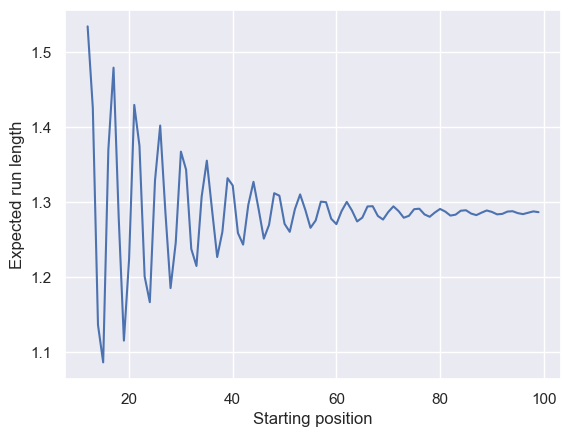

for l1 = 4 and l2 = 5, the long run probability is around 0.18181818181817272 and the best expected run length is 1.4748332849289532


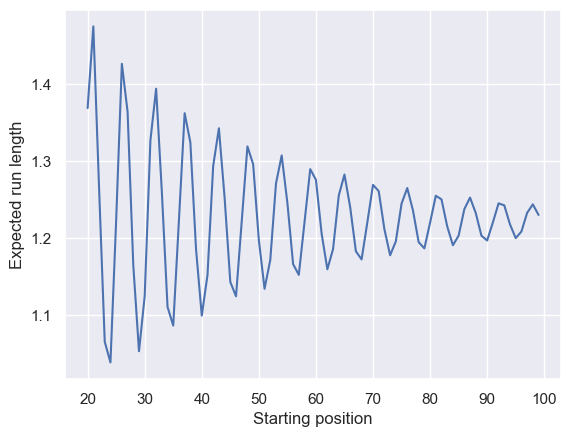

for l1 = 5 and l2 = 6, the long run probability is around 0.15384615358778783 and the best expected run length is 1.4259002533039726


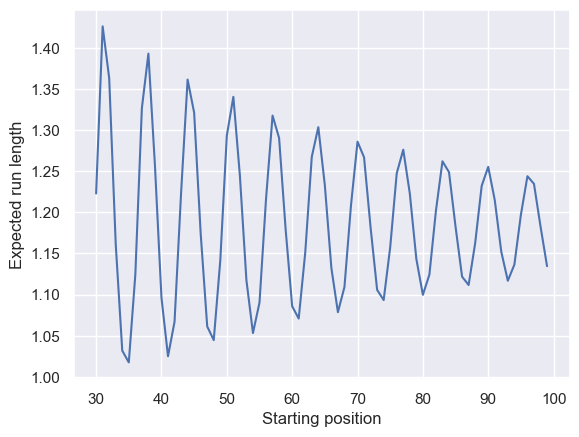

for l1 = 6 and l2 = 7, the long run probability is around 0.1333330279461662 and the best expected run length is 1.3927168252039506


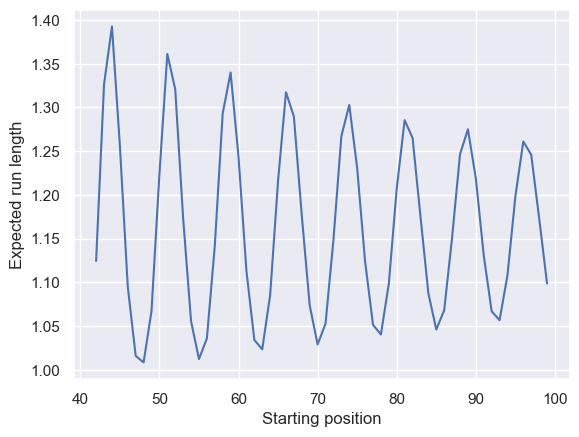

for l1 = 7 and l2 = 8, the long run probability is around 0.11760114685637649 and the best expected run length is 1.3611482960261865


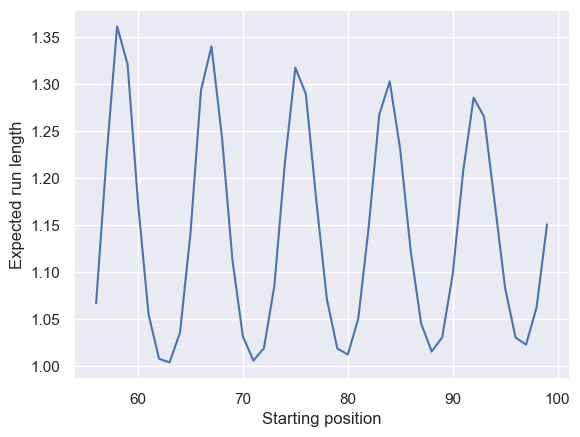

for l1 = 8 and l2 = 9, the long run probability is around 0.10526624610162034 and the best expected run length is 1.33999940306578


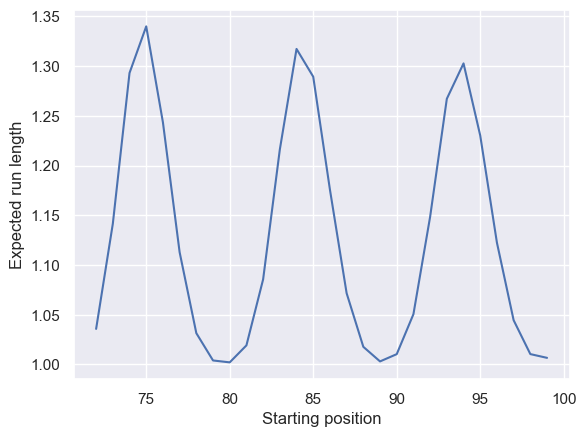

for l1 = 9 and l2 = 10, the long run probability is around 0.09554837117005532 and the best expected run length is 1.3173027866070357


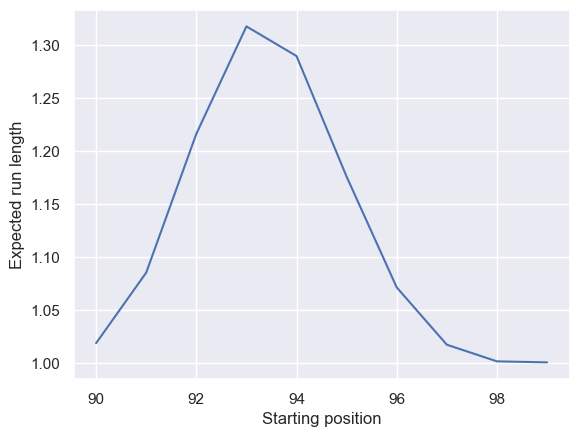

In [111]:
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
for l1 in range(1, 10):
    l2 = l1 + 1
    max_start = 100
    # l1, l2 = 7,8 

    min_start = l1 * l2
   
    
    expected_run_lengths = [E(i, l1, l2) if p(i, l1, l2) != 0 else 0 for i in range(min_start, max_start)]
    M = max(expected_run_lengths)
    print(f'for l1 = {l1} and l2 = {l2}, the long run probability is around {p(1000, l1, l2)} and the best expected run length is {M}')
   

    start_pos = [i for i in range(min_start, max_start)]
    sns.set_theme(style='darkgrid')   
    plt.plot(start_pos, expected_run_lengths)   
    plt.xlabel('Starting position')
    plt.ylabel('Expected run length')
    plt.show()

for l1 = 1 and l2 = 4, the long run probability is around 0.2857142857142857 and the best expected run length is 1.596717882594029


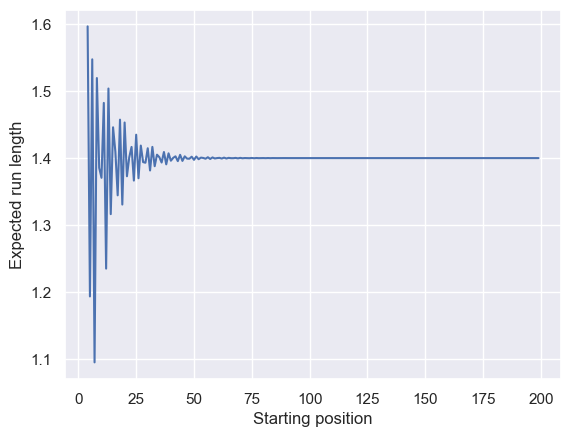

for l1 = 2 and l2 = 5, the long run probability is around 0.0 and the best expected run length is 1.0


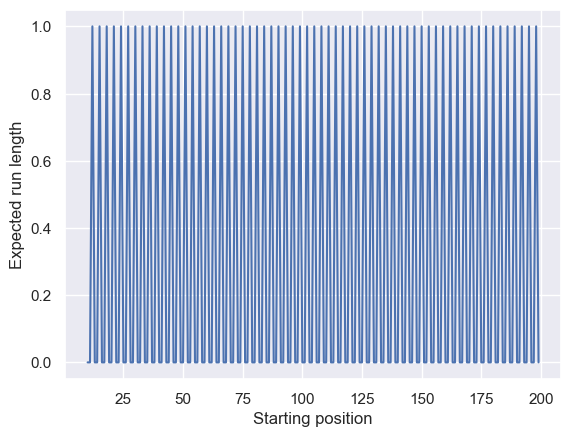

for l1 = 3 and l2 = 6, the long run probability is around 0.18181818181815695 and the best expected run length is 1.434817045930762


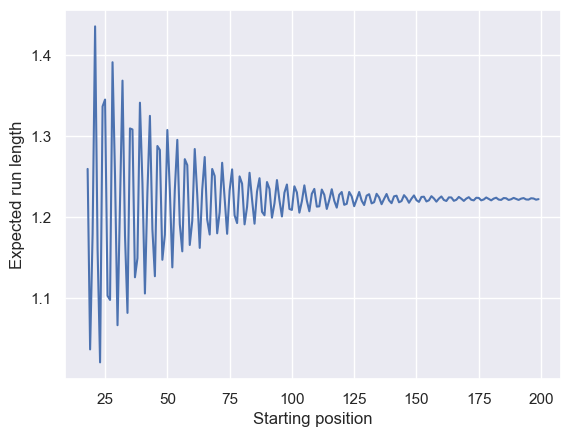

for l1 = 4 and l2 = 7, the long run probability is around 0.15384615319333328 and the best expected run length is 1.3344402029416773


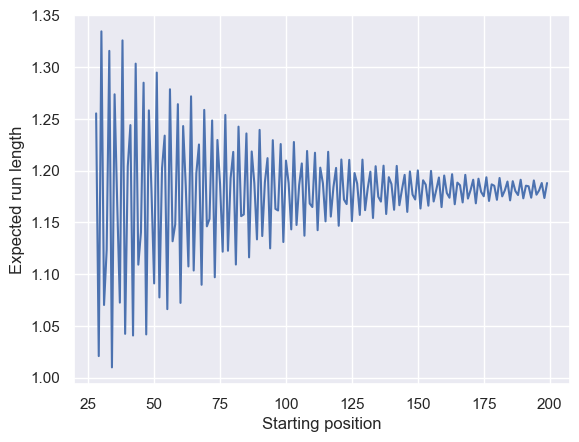

for l1 = 5 and l2 = 8, the long run probability is around 0.0 and the best expected run length is 1.0


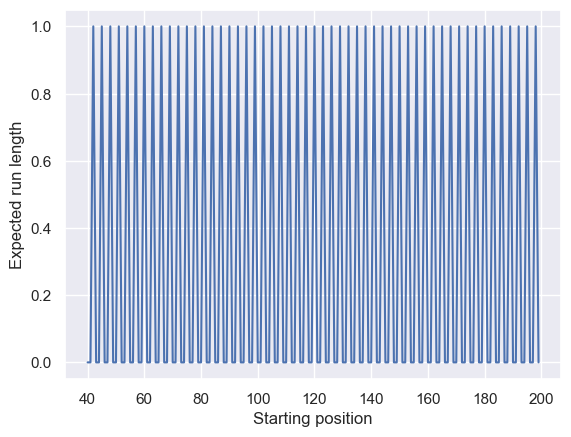

for l1 = 6 and l2 = 9, the long run probability is around 0.11766912035806631 and the best expected run length is 1.303414858227903


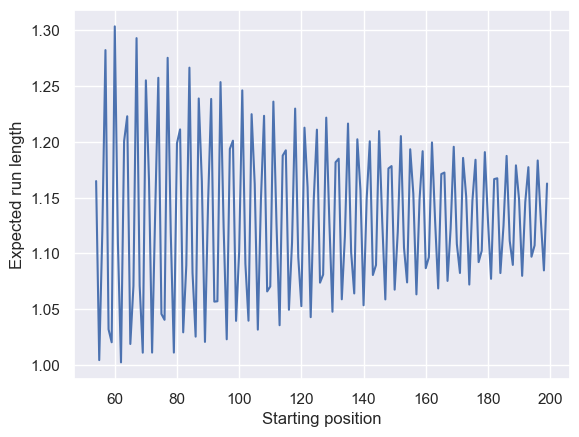

for l1 = 7 and l2 = 10, the long run probability is around 0.10482081430906934 and the best expected run length is 1.2757568291680903


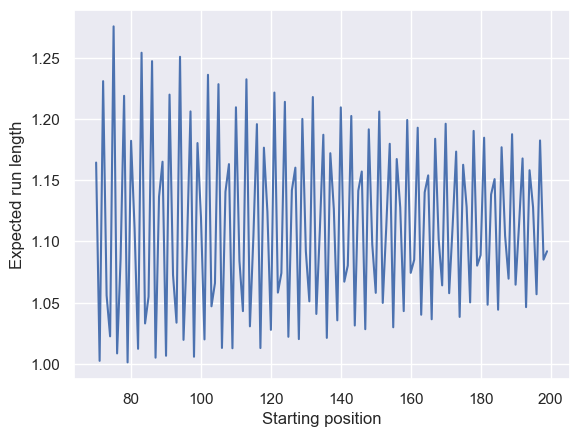

for l1 = 8 and l2 = 11, the long run probability is around 0.0 and the best expected run length is 1.0


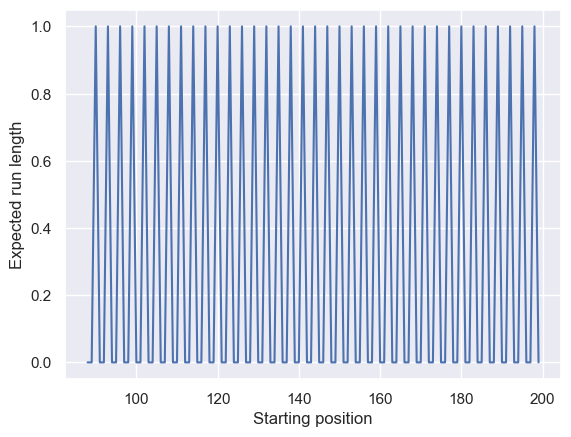

for l1 = 9 and l2 = 12, the long run probability is around 0.08275827620636822 and the best expected run length is 1.2527184816514143


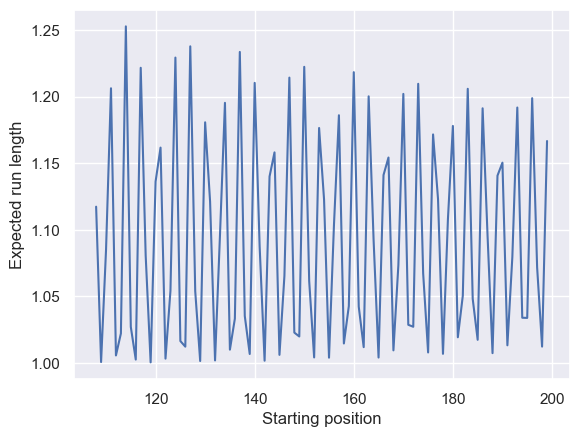

In [108]:
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
for l1 in range(1, 10):
    l2 = l1 + 3
    max_start = 200
    # l1, l2 = 7,8 

    min_start = l1 * l2 
    
    
    expected_run_lengths = [E(i, l1, l2) if p(i, l1, l2) != 0 else 0 for i in range(min_start, max_start)]
    M = max(expected_run_lengths)
    print(f'for l1 = {l1} and l2 = {l2}, the long run probability is around {p(1000, l1, l2)} and the best expected run length is {M}')
   

    start_pos = [i for i in range(min_start, max_start)]
    sns.set_theme(style='darkgrid')   
    plt.plot(start_pos, expected_run_lengths)   
    plt.xlabel('Starting position')
    plt.ylabel('Expected run length')
    plt.show()

Just some notes from this

* We need $gcd(\ell_1, \ell_2) = 1$ otherwise there will be infinitely many values that can never be spaces. 
* $\ell_2 = \ell_1 + 1$ tends to yield the longest expected rivers
* For a given word since distance, $k = \ell_2 - \ell_1$ smaller words tend to yield a longer expected value 